In [2]:
import numpy as np
import pandas as pd

def cell_p_tree(p_tree,i,j,move,mid_p):
	if move=="u":
		return p_tree[(mid_p - 1) + 1 + (3*j), i]
	if move=="d":
		return p_tree[(mid_p - 1) - 1 + (3*j), i]
	else:
		return p_tree[(mid_p - 1) + (3*j), i]

def cell_q_tree(q_tree,i,j,mid_q):
	return q_tree[(mid_q - 1) + j, i]

def cell_x_tree(x_tree,i,j,mid_x):
	return x_tree[(mid_x - 1) + j, i]

def prob_a(x,move):
	if move=="u":
		p=1/6 + (x*(x-1))/2
	elif move=="d":
		p=1/6 + (x*(x+1))/2
	else:
		p=2/3-x*x

	return p

def prob_b(x,move):
	if move=="u":
		p=1/6 + x*(x+1)/2
	elif move=="d":
		p= 7/6 + x*(x+3)/2
	else:
		p=-1/3 -x*(x+2)

	return p

def prob_c(x,move):
	if move=="u":
		p=7/6 + x*(x-3)/2
	elif move=="d":
		p= 1/6 + x*(x-1)/2
	else:
		p= -1/3 - x*(x-2)

	return p

def Q_Tree(T,N,r,affiche=0):
	import numpy as np
	#1 node is 2 steps and so 3 steps cols with 7 cells on last node
	dt=float(T)/N # step size, length of step in tree
	#dt = 0.5
	#a= 0.25 # qui vous a dit d'utiliser ça ?
	a = np.exp(r*dt)
	J = int(0.184/(a*dt))+1
	M = min(N,J)
 
  #On initialise la matrice Q 1 node 3 cells then 2 for each extra node so 3 + (N-1) * 2
	cae =  1 + 2*M
	Q=np.zeros((cae ,N+1))
	mid_q=M+1
	Q[mid_q-1, 0]=1
	#print("Q_init is ", Q)

  #calculate proba on the nodes, we have N nodes
  #each node has + 6 proba starting with 3 on node 0 - so 1 has 3 + (6 * 1) and 2 has 3 + (6*2)
  #on last node only do you have a change in the formulas use these init values to populate your tree of proba

	pae =  3 + (6 * M) 
	proba_tree = np.zeros((pae ,N))
	
	mid_p=3*M+2 # J'ai remplacé la longue phrase par mid pour plus de lisibilité

	#print("P_init is ", proba_tree)   
    
	for i in range(0, N):  #On choisit j = nombre de succès quand positif, nombre d'échec quand négatif
    
		n_i=min(J,i)

    #now populate above 3 and below 3 from center leave first and last 3 rows equal to 0 on last node
		for j in range(-n_i, n_i+1):
			proba_tree[(mid_p - 1)-1 + (3*j), i] = prob_a(a*j*dt,"d")
			proba_tree[(mid_p - 1) + (3*j), i] = prob_a(a*j*dt,"m")
			proba_tree[(mid_p - 1)+1 + (3*j), i] = prob_a(a*j*dt,"u")
        
        #now fill first and last 3 - error in output
			if j == M:
				proba_tree[(mid_p - 1)-1 + (3*j), i] = prob_c(a*j*dt,"d")
				proba_tree[(mid_p - 1) + (3*j), i] = prob_c(a*j*dt,"m")
				proba_tree[(mid_p - 1)+1 + (3*j), i] = prob_c(a*j*dt,"u")
			elif j == -M:
				proba_tree[(mid_p - 1)-1 + (3*j), i] = prob_b(a*j*dt,"d")
				proba_tree[(mid_p - 1) + (3*j), i] = prob_b(a*j*dt,"m")
				proba_tree[(mid_p - 1)+1 + (3*j), i] = prob_b(a*j*dt,"u")            
	if affiche:
		print("p_tree=\n",proba_tree)

	for i in range(N):
		n_i=min(i,J)
		for j in range(-n_i,n_i+1):
			#Recyclage du code précédant
			p_u=cell_p_tree(proba_tree,i,j,"u",mid_p)
			p_d=cell_p_tree(proba_tree,i,j,"d",mid_p)
			p_m=cell_p_tree(proba_tree,i,j,"m",mid_p)
			if (j==M):
				Q[mid_q-1+j,i+1]+=Q[mid_q-1+j,i]*p_u
				Q[mid_q-1+j-1,i+1]+=Q[mid_q-1+j,i]*p_m
				Q[mid_q-1+j-2,i+1]+=Q[mid_q-1+j,i]*p_d
			elif (j==-M):
				Q[mid_q-1+j+2,i+1]+=Q[mid_q-1+j,i]*p_u
				Q[mid_q-1+j+1,i+1]+=Q[mid_q-1+j,i]*p_m
				Q[mid_q-1+j,i+1]+=Q[mid_q-1+j,i]*p_d
			else:
				Q[mid_q-1+j+1,i+1]+=Q[mid_q-1+j,i]*p_u
				Q[mid_q-1+j,i+1]+=Q[mid_q-1+j,i]*p_m
				Q[mid_q-1+j-1,i+1]+=Q[mid_q-1+j,i]*p_d

	if affiche:
		print("q_tree=\n",Q)
	return Q,mid_q, proba_tree,mid_p

def X_Tree(T,N,r,sigma,K,affiche=0):

	dt=float(T)/N
	a = np.exp(r*dt)
	J = int(0.184/(a*dt))+1
	M = min(N,J)
	delta_x=sigma*np.sqrt(3*dt)
 
	cae =  1+2*M
	x_tree=np.zeros((cae ,N+1))
	mid_x=M+1

	for i in range(N+1):
		n_i=min(i,J)
		for j in range(-n_i,n_i+1):
			x_tree[mid_x-1+j,i]=delta_x*j      #+np.log(K)
	if affiche:
		print("x_tree=\n",x_tree)
	return(x_tree,mid_x)

def D_Tree(T,N,r,sigma,K,F,affiche=0,date=0):
	#y=pd.read_csv("y_coef.csv") #Attention il faut vérifier la présence du fichier y_coef.csv avant de lancer l'algorithme
	dt=float(T)/N
	a = np.exp(r*dt)
	J = int(0.184/(a*dt))+1
	M = min(N,J)
	cae =  1+2*M
	d_tree=np.zeros((cae ,N+1))
 
	q_tree,mid_q,p_tree,mid_p=Q_Tree(T,N,r)
	x_tree,mid_x=X_Tree(T,N,r,sigma,K)
	mid_d=mid_x
	for i in range(N+1):
		n_i=min(i,J)
		date=(date+int(365*dt))%365
		#f_i=y.Y_coef[date]
		f_i=1 #Ici on fixe f_i pour vérifier avec le tableur exel !
		sum =0
		for j in range(-n_i,n_i+1):
			sum+=np.exp(cell_x_tree(x_tree,i,j,mid_x))*cell_q_tree(q_tree,i,j,mid_q)
		a_i=np.log(F[i]/f_i)-np.log(sum)
		print("a_i=",a_i,"\n")
		for j in range(-n_i,n_i+1):
			d_tree[mid_d-1+j,i]=np.exp(x_tree[mid_x-1+j,i]+a_i)
	if affiche: #efficient market hypothesis
		print("d_tree=\n",d_tree)
	return(d_tree,mid_d)


def trinomialtree(T,N,S,r,sigma,K, typeEA, typeCP):

	if typeCP=="call":
		typeCP=1
	else:
		typeCP=-1	# put

	dt=float(T)/N # step size, length of step in tree
	u=np.exp(sigma*np.sqrt(dt)) # up and down steps
	d=1/u
	#p=(np.exp(r*dt)-d)/(u-d)
	a=np.exp(r*dt)
	


	ST=np.zeros(2*N+1)
	option=np.zeros(2*N+1)


	ST= np.asarray([(S*u**j) for j in range(-N, N+1)]) #Stock price at the end

	for i in range(0,2*N+1):
		option[i]=max(typeCP*(ST[i]-K),0) #Pay off at the end
											

	option[0]=np.exp(-r*dt)*(prob_b(a*N*dt,"d")*option[0]+prob_b(a*N*dt,"m")*option[1]+prob_b(a*N*dt,"u")*option[2])
	option[2*N]=np.exp(-r*dt)*(prob_c(a*N*dt,"d")*option[2*N-2]+prob_c(a*N*dt,"m")*option[2*N-1]+prob_c(a*N*dt,"d")*option[2*N])

	

	for j in range(1,2*N):
		option[j]=np.exp(-r*dt)*(prob_a(a*N*dt,"u")*option[j-1]+prob_a(a*N*dt,"m")*option[j]+prob_a(a*N*dt,"d")*option[j+1])
		
	

	for l in range(N-1,-1,-1):
		for j in range(0,2*l+1):
			option[j]=np.exp(-r*dt)*(prob_a(a*(j-i+1)*dt,"d")*option[j]+prob_a(a*(j-i)*dt,"m")*option[j+1]+prob_a(a*(j-i-1)*dt,"u")*option[j+2]) # price of option as the discount of the expected future ones
			if typeEA=="American":
				ST= np.asarray([np.exp(-r*dt)*(S*u**i) for i in range(-l, l+1)])
				option[j]=max(option[j], max(typeCP*(ST[j]-K),0))
				
			
				  #  the vector option is the max of price of option and payoff if we exercise the option cuz american option can be alwayse exercised
				#the price in the vector is the max of these two and will be the one in the tree

	return option[0]

def swing_call(T,N,S,r,sigma,K,n,qmax,Qmax,affiche=0):
	q_tree, mid_q, p_tree, mid_p = Q_Tree(T,N,r,affiche=0)
	d_tree, mid_d = D_Tree(T,N,r,sigma,K,F,affiche=0,date=0)
	swing_trials = [np.shape(d_tree)]*n
 
	dt=float(T)/N
	a = np.exp(r*dt)
	J = int(0.184/(a*dt))+1

	for k in range(n):
		call = min(qmax,max(Qmax-k*qmax,0))
		trial = np.zeros(np.shape(d_tree))
		n_N=min(N,J)
		for j in range(-n_N,n_N+1):
			trial[(mid_d - 1) + j, N]=max(call*(cell_x_tree(d_tree,N,j,mid_d)-S),0)
		for i in range(N-1,-1,-1):
			n_i=min(i,J)
			for j in range(-n_i,n_i+1):
				if (k>0):
					if (j==J):
						esperence = cell_x_tree(trial,i+1,j-1,mid_d)*cell_p_tree(p_tree,i,j,"m",mid_p) 
						esperence+= cell_x_tree(trial,i+1,j,mid_d)*cell_p_tree(p_tree,i,j,"u",mid_p) 
						esperence+= cell_x_tree(trial,i+1,j-2,mid_d)*cell_p_tree(p_tree,i,j,"d",mid_p) #On calcule l'espérence

						swing = cell_x_tree(swing_trials[k-1],i+1,j-1,mid_d)*cell_p_tree(p_tree,i,j,"m",mid_p) 
						swing+= cell_x_tree(swing_trials[k-1],i+1,j,mid_d)*cell_p_tree(p_tree,i,j,"u",mid_p) 
						swing+= cell_x_tree(swing_trials[k-1],i+1,j-2,mid_d)*cell_p_tree(p_tree,i,j,"d",mid_p) #On calcule l'espérence de la swing[k-1]

						trial[(mid_d - 1) + j, i]=max(call*(cell_x_tree(d_tree,i,j,mid_d)-S)+swing,esperence) #max entre achat + swing[k-1] et esperence des swing[k]
					elif (j==-J):
						esperence = cell_x_tree(trial,i+1,j+1,mid_d)*cell_p_tree(p_tree,i,j,"m",mid_p) 
						esperence+= cell_x_tree(trial,i+1,j+2,mid_d)*cell_p_tree(p_tree,i,j,"u",mid_p) 
						esperence+= cell_x_tree(trial,i+1,j,mid_d)*cell_p_tree(p_tree,i,j,"d",mid_p) #On calcule l'espérence

						swing = cell_x_tree(swing_trials[k-1],i+1,j+1,mid_d)*cell_p_tree(p_tree,i,j,"m",mid_p) 
						swing+= cell_x_tree(swing_trials[k-1],i+1,j+2,mid_d)*cell_p_tree(p_tree,i,j,"u",mid_p) 
						swing+= cell_x_tree(swing_trials[k-1],i+1,j,mid_d)*cell_p_tree(p_tree,i,j,"d",mid_p) #On calcule l'espérence de la swing[k-1]

						trial[(mid_d - 1) + j, i]=max(call*(cell_x_tree(d_tree,i,j,mid_d)-S)+swing,esperence) #max entre achat + swing[k-1] et esperence des swing[k]
					else: 
						esperence = cell_x_tree(trial,i+1,j,mid_d)*cell_p_tree(p_tree,i,j,"m",mid_p) 
						esperence+= cell_x_tree(trial,i+1,j+1,mid_d)*cell_p_tree(p_tree,i,j,"u",mid_p) 
						esperence+= cell_x_tree(trial,i+1,j-1,mid_d)*cell_p_tree(p_tree,i,j,"d",mid_p) #On calcule l'espérence

						swing = cell_x_tree(swing_trials[k-1],i+1,j,mid_d)*cell_p_tree(p_tree,i,j,"m",mid_p) 
						swing+= cell_x_tree(swing_trials[k-1],i+1,j+1,mid_d)*cell_p_tree(p_tree,i,j,"u",mid_p) 
						swing+= cell_x_tree(swing_trials[k-1],i+1,j-1,mid_d)*cell_p_tree(p_tree,i,j,"d",mid_p) #On calcule l'espérence de la swing[k-1]

						trial[(mid_d - 1) + j, i]=max(call*(cell_x_tree(d_tree,i,j,mid_d)-S)+swing,esperence) #max entre achat + swing[k-1] et esperence des swing[k]




				else: #cas k=0
					if (j==J):
						esperence = cell_x_tree(trial,i+1,j-1,mid_d)*cell_p_tree(p_tree,i,j,"m",mid_p) 
						esperence+= cell_x_tree(trial,i+1,j,mid_d)*cell_p_tree(p_tree,i,j,"u",mid_p) 
						esperence+= cell_x_tree(trial,i+1,j-2,mid_d)*cell_p_tree(p_tree,i,j,"d",mid_p) #On calcule l'espérence
						trial[(mid_d - 1) + j, i]=max(call*(cell_x_tree(d_tree,i,j,mid_d)-S),esperence) #max entre achat et esperence des swing[0]
					elif (j==-J):
						esperence = cell_x_tree(trial,i+1,j+1,mid_d)*cell_p_tree(p_tree,i,j,"m",mid_p) 
						esperence+= cell_x_tree(trial,i+1,j+2,mid_d)*cell_p_tree(p_tree,i,j,"u",mid_p) 
						esperence+= cell_x_tree(trial,i+1,j,mid_d)*cell_p_tree(p_tree,i,j,"d",mid_p) #On calcule l'espérence
						trial[(mid_d - 1) + j, i]=max(call*(cell_x_tree(d_tree,i,j,mid_d)-S),esperence) #max entre achat et esperence des swing[0]
					else:
						esperence = cell_x_tree(trial,i+1,j,mid_d)*cell_p_tree(p_tree,i,j,"m",mid_p) 
						esperence+= cell_x_tree(trial,i+1,j+1,mid_d)*cell_p_tree(p_tree,i,j,"u",mid_p) 
						esperence+= cell_x_tree(trial,i+1,j-1,mid_d)*cell_p_tree(p_tree,i,j,"d",mid_p) #On calcule l'espérence
						trial[(mid_d - 1) + j, i]=max(call*(cell_x_tree(d_tree,i,j,mid_d)-S),esperence) #max entre achat et esperence des swing[0]

		swing_trials[k]=trial #On sauvegarde l'arbre créé
	if affiche:
		for k in range(n):
			print("swing_",k+1,"=\n",swing_trials[k])
	return(cell_x_tree(swing_trials[n-1],0,0,mid_d))



############################################# Début Main
#Initialisation variables
T=0.5
N=2
dt=T/N
a=1.03
S=100
r=0.12
sigma=0.2
K=100

#Comparaison des prix américains et européens
price=trinomialtree(T,N,S,r,sigma,K,"American","call")

print("le prix de l'option americaine vaut",price)
print("le prix de l'option europenne vaut",trinomialtree(T,N,S,r,sigma,K,"","call"))


#Tests Trees
Q=Q_Tree(3/12,3,np.log(3)*12,affiche=0)

X=X_Tree(3/12,3,np.log(3)*12,0.6,0.8,affiche=1)

# à tester séparément : D=D_Tree(3/12,3,np.log(3)*12,0.6,0.8,affiche=1)

Q=Q_Tree(1.5,3,np.log(0.25)/0.5,affiche=0)

F=[47.35,47.81,48.09,48,21]

Q_Tree(1.5,3,np.log(0.25)/0.5,affiche=1)

#D_Tree(T,N,r,sigma,K,F,affiche=0,date=0)
D=D_Tree(1.5,3,np.log(0.25)/0.5,0.3,46.5,F,affiche=1)

#swing_call(T,N,S,r,sigma,K,n,qmax,Qmax,affiche=0)
prix=swing_call(1.5,3,46.5,np.log(0.25)/0.5,0.3,46.5,3,1,3,affiche=1)

print("Le prix de la swing est : ",prix)

le prix de l'option americaine vaut 9.358712761541204
le prix de l'option europenne vaut 9.358712761541204
x_tree=
 [[ 0.  -0.3 -0.3 -0.3]
 [ 0.   0.   0.   0. ]
 [ 0.   0.3  0.3  0.3]]
p_tree=
 [[0.         0.         0.82291667]
 [0.         0.         0.10416667]
 [0.         0.         0.07291667]
 [0.         0.11197917 0.11197917]
 [0.         0.65104167 0.65104167]
 [0.         0.23697917 0.23697917]
 [0.16666667 0.16666667 0.16666667]
 [0.66666667 0.66666667 0.66666667]
 [0.16666667 0.16666667 0.16666667]
 [0.         0.23697917 0.23697917]
 [0.         0.65104167 0.65104167]
 [0.         0.11197917 0.11197917]
 [0.         0.         0.07291667]
 [0.         0.         0.10416667]
 [0.         0.         0.82291667]]
q_tree=
 [[0.         0.         0.01866319 0.0399509 ]
 [0.         0.16666667 0.21961806 0.23216417]
 [1.         0.66666667 0.5234375  0.45576986]
 [0.         0.16666667 0.21961806 0.23216417]
 [0.         0.         0.01866319 0.0399509 ]]
a_i= 3.857566819632

In [ ]:
2*0.0399509+2*0.23216417+0.45576986

1.0

     Unnamed: 0        Date       Month    M_coef
0             1  2022-04-01  2022-04-01  1.071672
1             2  2022-04-02  2022-04-01  1.072550
2             3  2022-04-03  2022-04-01  1.072963
3             4  2022-04-04  2022-04-01  1.073103
4             5  2022-04-05  2022-04-01  1.074562
..          ...         ...         ...       ...
360         361  2023-03-27  2023-03-01  0.901538
361         362  2023-03-28  2023-03-01  0.873144
362         363  2023-03-29  2023-03-01  0.868400
363         364  2023-03-30  2023-03-01  0.867339
364         365  2023-03-31  2023-03-01  0.859085

[365 rows x 4 columns]
     Unnamed: 0        Date     Y    Y_coef
0             1  2022-04-01  2022  1.087596
1             2  2022-04-02  2022  1.088488
2             3  2022-04-03  2022  1.088906
3             4  2022-04-04  2022  1.089049
4             5  2022-04-05  2022  1.090530
..          ...         ...   ...       ...
360         361  2023-03-27  2023  0.892461
361         362  2023-03

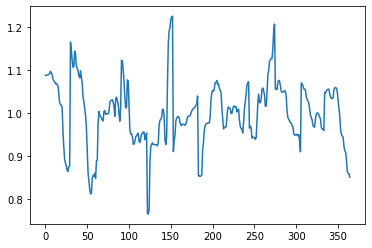

In [ ]:
import matplotlib.pyplot as plt
m=pd.read_csv("m_coef.csv")
print(m)
y=pd.read_csv("y_coef.csv")
print(y)
plt.plot(y.Y_coef)